# Lançamento Parabólico 

Esse código é um complemento das aulas. Primeiro, rode o código abaixo para criar os objetos que queremos simular. No caderno Jupyter digite: **Shift + Enter**

In [19]:
# Pacotes 

from vpython import *
import matplotlib.pyplot as plt
import numpy as np

## Alcance e Altura máxima

In [20]:
scene = canvas()

scene.camera.pos = vector(12,8,0)
# gravidade é uma variável global
g = 9.8 

# Objetos: projetil, eixos 
projetil = sphere(pos=vector(0,0,0), color=color.cyan, radius=0.5, make_trail=True)
eixoX = arrow(pos=vector(0,0,0), axis=vector(25,0,0), shaftwidth=0.3, round = True, color = vector(1,1,1))
eixoY = arrow(pos=vector(0,0,0), axis=vector(0,15,0), shaftwidth=0.3, round = True, color = vector(1,1,1))

<IPython.core.display.Javascript object>

Agora faremos alguns lançamentos parabólicos a uma velocidade inicial de 15 m/s e diversos ângulos. No código abaixo, você pode mudar a velocidade incial, mas tome algum cuidado pois talvez você precise redimensionar a posição da câmera acima. No que diz respeito a esse código, sugiro considerar valocidades iniciais entre 10m/s e 15m/s.

Observe também que o alcance a altura máxima e o alcance são impessos abaixo. 

Finalmente, observe o alcance para os ângulos $\theta = \frac{\pi}{3}$ e $\theta = \frac{\pi}{6}$. Usando a propriedade trigonométrica $\sin(\alpha + \beta) = 2 \sin(\alpha)\sin(\beta)$, explique a relação entre o alcance nesses dois ângulos. 

In [21]:
sleep(2)

angles = [pi / 2, pi / 3, pi / 4, pi / 6, pi / 7, pi / 8, pi /12]
v0 = 14

for theta in angles:
    
    t = 0
    dt = 0.01


    y = v0 * sin(theta)* t - (9.8 * t ** 2) / 2

    while y >= 0:
        rate(100)

        u = vector(v0 * cos(theta) * t, v0 * sin(theta)* t - (9.8 * t ** 2) / 2,0)

        projetil.pos = u
        t += dt
        y = v0 * sin(theta)* t - (9.8 * t ** 2) / 2
    altura = (v0 ** 2) * (sin(theta)**2) / (2 * 9.8)
    alcance = (v0 ** 2) * (sin(2 * theta)) / (9.8)
    print(f"# Ângulo {theta} e velocidade inicial de magnitude {v0}m/s: Altura Máxima = {altura}m | Alcance = {alcance}m")

# Ângulo 1.5707963267948966 e velocidade inicial de magnitude 14m/s: Altura Máxima = 10.0m | Alcance = 2.4492935982947065e-15m
# Ângulo 1.0471975511965976 e velocidade inicial de magnitude 14m/s: Altura Máxima = 7.499999999999998m | Alcance = 17.320508075688775m
# Ângulo 0.7853981633974483 e velocidade inicial de magnitude 14m/s: Altura Máxima = 4.999999999999998m | Alcance = 20.0m
# Ângulo 0.5235987755982988 e velocidade inicial de magnitude 14m/s: Altura Máxima = 2.499999999999999m | Alcance = 17.32050807568877m
# Ângulo 0.4487989505128276 e velocidade inicial de magnitude 14m/s: Altura Máxima = 1.882550990706332m | Alcance = 15.636629649360593m
# Ângulo 0.39269908169872414 e velocidade inicial de magnitude 14m/s: Altura Máxima = 1.4644660940672625m | Alcance = 14.142135623730947m
# Ângulo 0.2617993877991494 e velocidade inicial de magnitude 14m/s: Altura Máxima = 0.6698729810778066m | Alcance = 9.999999999999998m


## Energia Cinética, potencial e mecânica

---
**Energia Cinética:** Esse termo depende unicamente do movimento das partículas e é dado por 
                
$$ T = \frac{M}{2} \vec{v}\cdot \vec{v} = \frac{M}{2} (v_x^2+ v_y^2)$$

No código abaixo, calculamos a energia cinética para diferentes velocidades iniciais. Brinque com o código abaixo e veja o que está acontecendo.

In [22]:
M = 2.4          # Massa da partícula
v0 = 27.6        # Magnitude da velocidade inicial 
theta = 0.33 * pi   # Ângulo da lançamento

# Escolhemos números estranhos pois são mais interessantes do ponto de vista numérico.

In [23]:
# Energia Cinética 

t = 0
dt = 0.4

y = v0 * sin(theta)* t - (9.8 * t ** 2) / 2

while y >= 0:
    y = v0 * sin(theta)* t - (9.8 * t ** 2) / 2
    
    cinetica = M * ((v0 * cos(theta))**2 +  (v0 * sin(theta) - g * t )**2 ) / 2
    
    t += dt
    
    print(f"# Energia Cinética {cinetica} J")

# Energia Cinética 914.1120000000001 J
# Energia Cinética 709.0507166745344 J
# Energia Cinética 540.8687933490688 J
# Energia Cinética 409.56623002360305 J
# Energia Cinética 315.1430266981375 J
# Energia Cinética 257.5991833726719 J
# Energia Cinética 236.93470004720632 J
# Energia Cinética 253.1495767217407 J
# Energia Cinética 306.243813396275 J
# Energia Cinética 396.2174100708094 J
# Energia Cinética 523.0703667453436 J
# Energia Cinética 686.802683419878 J
# Energia Cinética 887.4143600944125 J
# Energia Cinética 1124.9053967689474 J


---

**Energia Potencial:** A partícula está num potencial gravitacional, portanto a energia potencial é dada por 
                
$$ V = M g\left(v_0 \sin(\theta) t - \frac{g t^2 }{2}\right)$$

No código abaixo, calculamos a energia potencial para diferentes velocidades iniciais.

In [24]:
# Energia Cinética 

t = 0
dt = 0.4

y = v0 * sin(theta)* t - (g * t ** 2) / 2

while y >= 0:
    
    potencial = M * g * y
        
    y = v0 * sin(theta)* t - (9.8 * t ** 2) / 2
    t += dt

    if y >= 0:
        print(f"# Energia Potencial {potencial} J")


# Energia Potencial 0.0 J
# Energia Potencial 0.0 J
# Energia Potencial 205.0612833254656 J
# Energia Potencial 373.2432066509312 J
# Energia Potencial 504.54576997639685 J
# Energia Potencial 598.9689733018624 J
# Energia Potencial 656.5128166273281 J
# Energia Potencial 677.1772999527938 J
# Energia Potencial 660.9624232782595 J
# Energia Potencial 607.8681866037251 J
# Energia Potencial 517.8945899291907 J
# Energia Potencial 391.0416332546562 J
# Energia Potencial 227.30931658012204 J


---

**Energia Total:** Soma da energia cinética e potencial. Esse termo deve ser constante. 

In [25]:
# Energia Total 

t = 0
dt = 0.4

y = v0 * sin(theta)* t - (g * t ** 2) / 2

while y >= 0:
    y = v0 * sin(theta)* t - (9.8 * t ** 2) / 2
    
    cinetica = M * ((v0 * cos(theta))**2 +  (v0 * sin(theta) - g * t )**2 ) / 2
    potencial = M * g * (v0 * sin(theta)* t - (g * t ** 2) / 2)
    
    mecanica = cinetica + potencial
    
    t += dt
    if y > 0:
        print(f"# Energia Total {mecanica} J")

# Energia Total 914.1120000000001 J
# Energia Total 914.1120000000001 J
# Energia Total 914.1119999999999 J
# Energia Total 914.1119999999999 J
# Energia Total 914.1120000000001 J
# Energia Total 914.1120000000001 J
# Energia Total 914.1120000000002 J
# Energia Total 914.1120000000001 J
# Energia Total 914.1120000000001 J
# Energia Total 914.1119999999997 J
# Energia Total 914.1120000000001 J
# Energia Total 914.1120000000001 J


**!! Observe que a o erro aparece nas casas decimais, e são resultados de aproximações numéricas no código**

## Gráficos. 

Vamos plotar os gráficos das energias

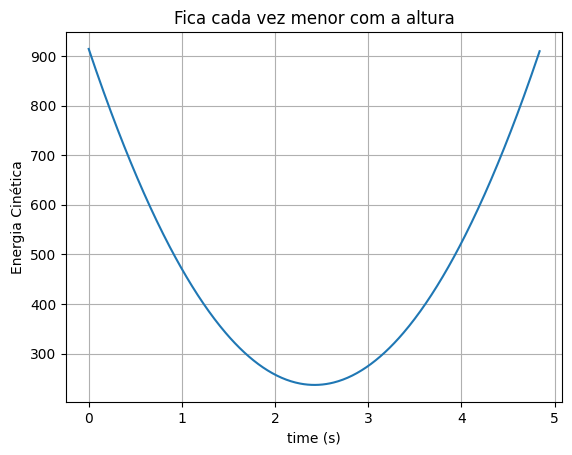

In [26]:
# Vamos plotar o gráfico da energia cinética

tempo_total = (2 * v0 * sin(theta)) / g  # tempo total da a particula permanece em movimento. 

t = np.arange(0.0, tempo_total, 0.01)

cinetica = M * ((v0 * cos(theta))**2 +  (v0 * sin(theta) - g * t )**2 ) / 2

fig, ax = plt.subplots()
ax.plot(t, cinetica)

ax.set(xlabel='time (s)', ylabel='Energia Cinética',
       title='Fica cada vez menor com a altura')
ax.grid()

plt.show()

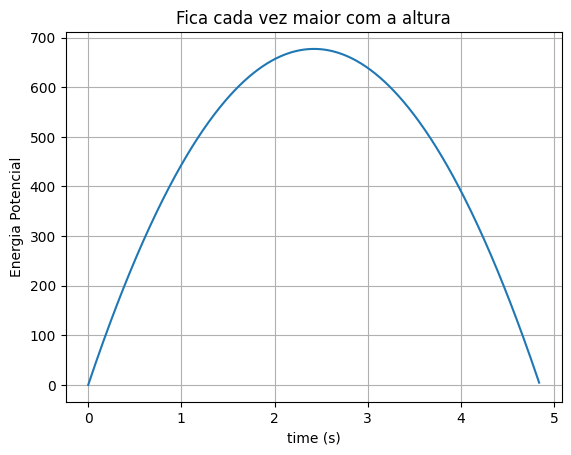

In [27]:
# Vamos plotar o gráfico da energia potencial

tempo_total = (2 * v0 * sin(theta)) / g  # tempo total da a particula permanece em movimento. 

t = np.arange(0.0, tempo_total, 0.01)

potencial = M * g * (v0 * sin(theta)* t - (g * t ** 2) / 2)

fig, ax = plt.subplots()
ax.plot(t, potencial)

ax.set(xlabel='time (s)', ylabel='Energia Potencial',
       title='Fica cada vez maior com a altura')
ax.grid()

plt.show()

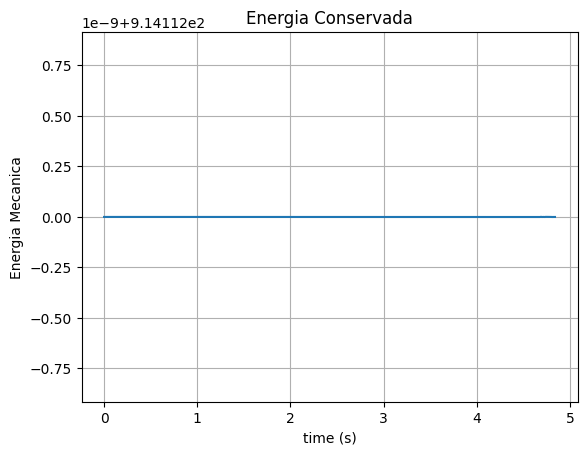

In [28]:
# Vamos plotar o gráfico da energia total

tempo_total = (2 * v0 * sin(theta)) / g  # tempo total da a particula permanece em movimento. 

t = np.arange(0.0, tempo_total, 0.01)

# cinetica = M * ((v0 * cos(theta))**2 +  (v0 * sin(theta) - g * t )**2 ) / 2
# potencial = M * g * (v0 * sin(theta)* t - (g * t ** 2) / 2)
# mecanica = cinetica + potencial

mecanica = M * ((v0 * cos(theta))**2 +  (v0 * sin(theta) - g * t )**2 ) / 2 + M * g * (v0 * sin(theta)* t - (g * t ** 2) / 2)

fig, ax = plt.subplots()
ax.plot(t, mecanica)

ax.set(xlabel='time (s)', ylabel='Energia Mecanica',
       title='Energia Conservada')
ax.grid()

plt.show()

**Observe que no canto superior esquerdo temos a notação 9.14E2, isso significa que o gráfico foi devidamente normalizado.**